# Mini Projeto - Machine Learning

## 3ª Etapa: Classificação completo de digitos - estratégia 1 contra todos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from linear_models import *
from utils import *

In [2]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

In [3]:
X_train = new_train_df[['intensidade', 'simetria']]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = new_test_df[['intensidade', 'simetria']]
X_test = X_test.to_numpy()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = new_train_df['label']
y_train = y_train.to_numpy()

y_test = new_test_df['label']
y_test = y_test.to_numpy()

---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.9614349775784753
Multiclass Error: 0.03856502242152467
_______________________________________________________
_______________________________________________________
Precision for label 0 : 1.0
Recall for label 0 : 0.9495412844036697
F1 Score for label 0 : 0.9741176470588235
_______________________________________________________
_______________________________________________________
Precision for label 1 : 1.0
Recall for label 1 : 1.0
F1 Score for label 1 : 1.0
_______________________________________________________
_______________________________________________________
Precision for label 4 : 0.9272727272727272
Recall for label 4 : 0.9745222929936306
F1 Score for label 4 : 0.9503105590062112
_______________________________________________________
_______________________________________________________
Precision for label 5 : 0.9335664335664335
Re

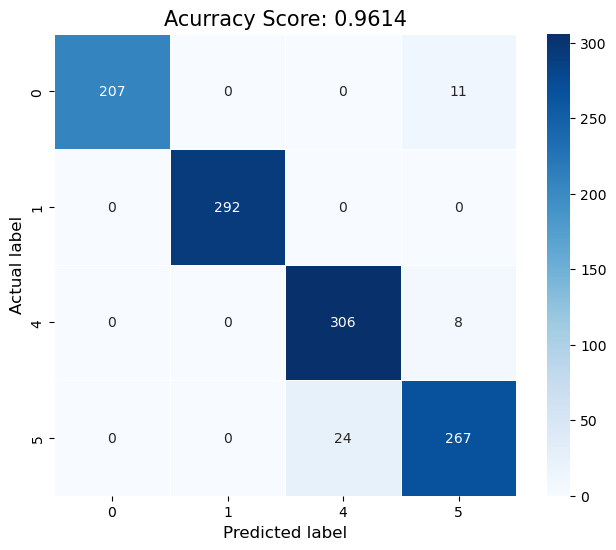

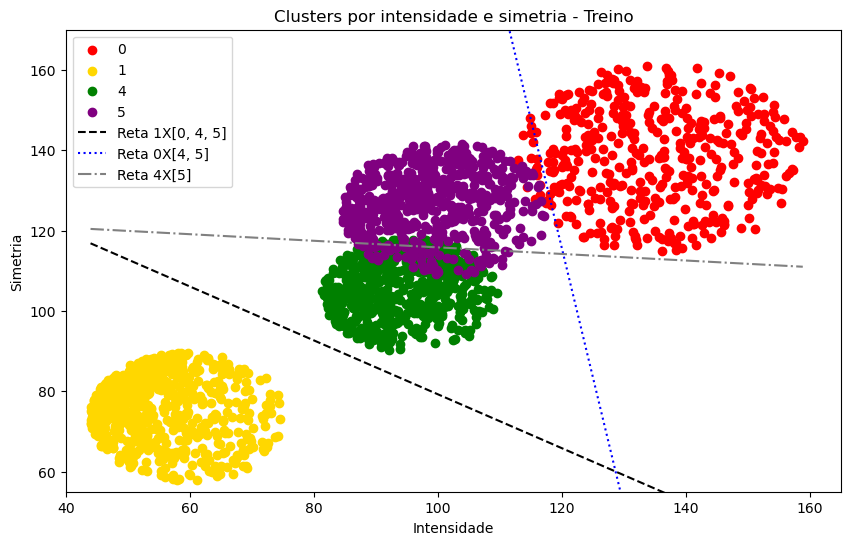

In [4]:
digitos = [0, 1, 4, 5]

lr = LinearRegression()

digitos = [1, 0, 4, 5]
modelo = Um_contra_todos(lr, digitos)
modelo.execute(X_train, y_train)
all_w = modelo.get_all_w()
ypred = modelo.predict_digit(X_test)


metrics = Metrics_multiclass(digitos)
metrics.print_metrics_multiclass(y_test, ypred)
plot_classification_digits(new_train_df, digitos, 'Clusters por intensidade e simetria - Treino', W=all_w[:4])

100%|██████████| 20000/20000 [04:02<00:00, 82.60it/s] 


---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.9605381165919282
Multiclass Error: 0.039461883408071746
_______________________________________________________
_______________________________________________________
Precision for label 0 : 0.9508928571428571
Recall for label 0 : 0.9770642201834863
F1 Score for label 0 : 0.9638009049773757
_______________________________________________________
_______________________________________________________
Precision for label 1 : 1.0
Recall for label 1 : 1.0
F1 Score for label 1 : 1.0
_______________________________________________________
_______________________________________________________
Precision for label 4 : 0.9333333333333333
Recall for label 4 : 0.9808917197452229
F1 Score for label 4 : 0.9565217391304348
_______________________________________________________
_______________________________________________________
Precision for label 5 : 0.959

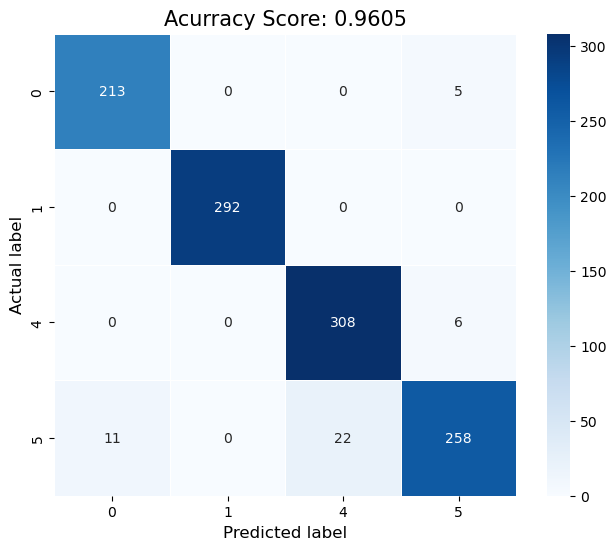

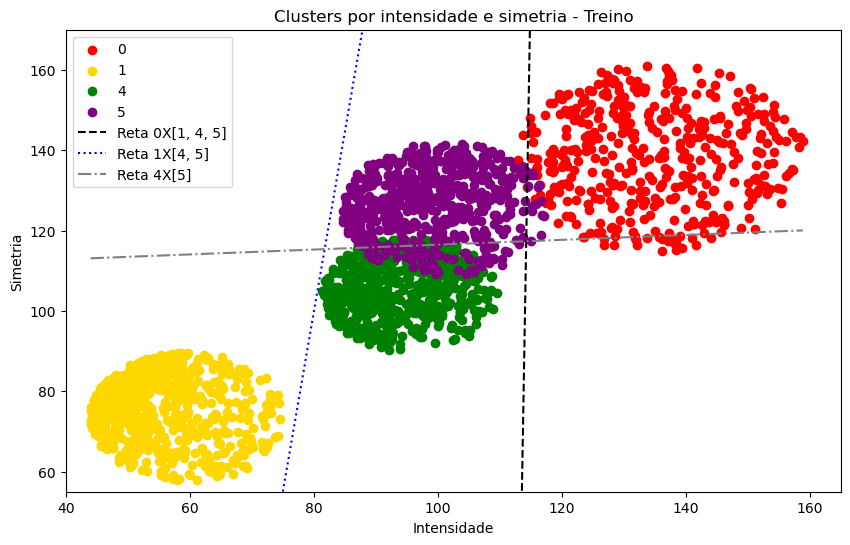

In [7]:
digitos = [0, 1, 4, 5]

Nmin = np.ceil(X_train.shape[0] * 0.5).astype(int)
Nmax = np.ceil(X_train.shape[0] * 1.0).astype(int) 

lr = PocketPLA(20000, Nmin=Nmin, Nmax=Nmax)

modelo = Um_contra_todos(lr, digitos)
modelo.execute(X_train, y_train)
all_w = modelo.get_all_w()
ypred = modelo.predict_digit(X_test)


metrics = Metrics_multiclass(digitos)
metrics.print_metrics_multiclass(y_test, ypred)
plot_classification_digits(new_train_df, digitos, 'Clusters por intensidade e simetria - Treino', W=all_w[:4])

100%|██████████| 1000000/1000000 [01:27<00:00, 11442.10it/s]


---------------------------------
RELATORIO CLASSIFICACAO MULTICLASS
_______________________________________________________
Acurracy: 0.8233183856502242
Multiclass Error: 0.17668161434977578
_______________________________________________________
_______________________________________________________
Precision for label 0 : 1.0
Recall for label 0 : 0.944954128440367
F1 Score for label 0 : 0.9716981132075472
_______________________________________________________
_______________________________________________________
Precision for label 1 : 1.0
Recall for label 1 : 1.0
F1 Score for label 1 : 1.0
_______________________________________________________
_______________________________________________________
Precision for label 4 : 1.0
Recall for label 4 : 0.410828025477707
F1 Score for label 4 : 0.582392776523702
_______________________________________________________
_______________________________________________________
Precision for label 5 : 0.5963114754098361
Recall for label 5 :

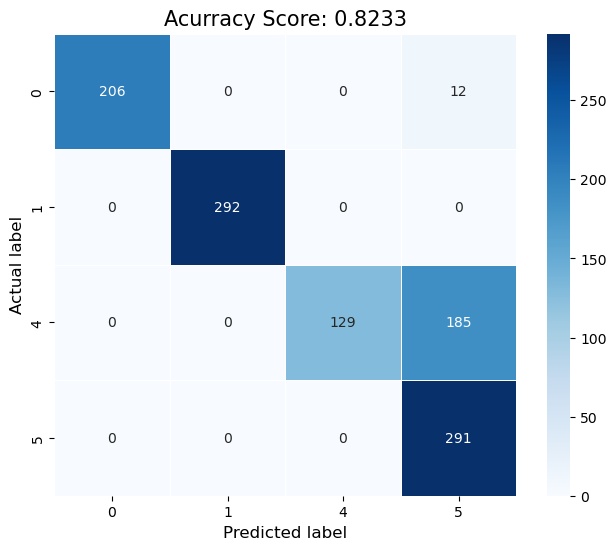

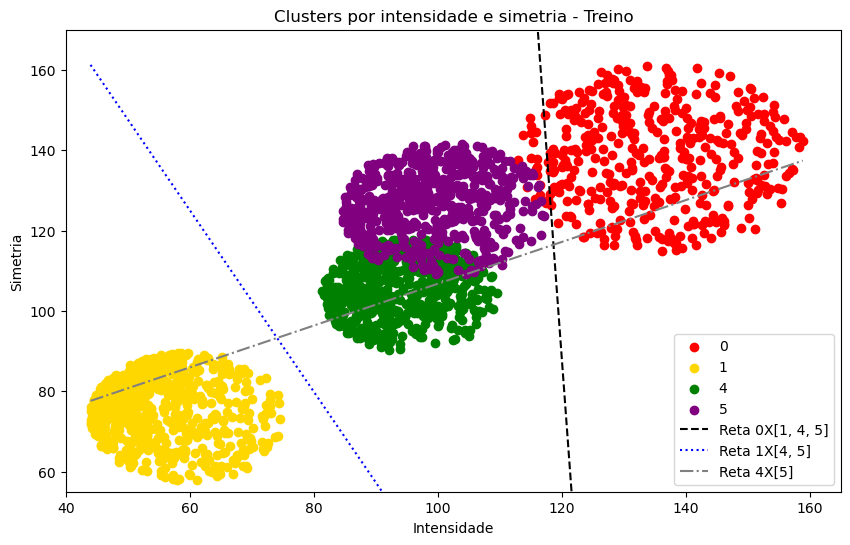

In [11]:
digitos = [0, 1, 4, 5]

lr = LogisticRegression(tmax=1000000, batch_size=128)
modelo = Um_contra_todos(lr, digitos)
modelo.execute(X_train, y_train)
all_w = modelo.get_all_w()
ypred = modelo.predict_digit(X_test)


metrics = Metrics_multiclass(digitos)
metrics.print_metrics_multiclass(y_test, ypred)
plot_classification_digits(new_train_df, digitos, 'Clusters por intensidade e simetria - Treino', W=all_w[:4])

In [ ]:
ordens_digitos = [
    [1, 0, 4, 5],
    [1, 4, 0, 5],
    [1, 5, 0, 4],
    [1, 0, 5, 4],
    [1, 4, 5, 0],
    [1, 5, 4, 0],                               
    [0, 1, 4, 5],
    [0, 1, 5, 4],
    [0, 4, 1, 5],
    [0, 4, 5, 1],
    [0, 5, 1, 4],
    [0, 5, 4, 1],
    [4, 1, 0, 5],
    [4, 1, 5, 0],
    [4, 0, 1, 5],
    [4, 0, 5, 1],
    [4, 5, 0, 1],
    [4, 5, 1, 0],
    [5, 1, 0, 4],
    [5, 1, 4, 0],
    [5, 0, 1, 4],
    [5, 0, 4, 1],
    [5, 4, 0, 1],
    [5, 4, 1, 0],
]

In [ ]:
lr = LinearRegression()

best_acc = 0
best_ordem = None
best_all_w = None
best_pred = None

for i, ordem in enumerate(ordens_digitos):
    modelo = Um_contra_todos(lr, ordem)
    modelo.execute(X_train, y_train)
    all_w = modelo.get_all_w()
    ypred = modelo.predict_digit(X_test)
    acc = accuracy_score(y_test, ypred)
    if acc > best_acc:
        best_acc = acc
        best_ordem = ordem
        best_all_w = all_w
        best_pred = ypred

print(best_acc)
print(best_ordem)
confusion_matrix_plot(y_test, best_pred)

In [ ]:
Nmin = np.ceil(X_train.shape[0] * 0.5).astype(int)
Nmax = np.ceil(X_train.shape[0] * 1.0).astype(int)

lr = PocketPLA(30000, Nmin=Nmin, Nmax=Nmax)

best_acc = 0
best_ordem = None
best_all_w = None
best_pred = None
len_ordens = len(ordens_digitos)

modelo = Um_contra_todos(lr, [0, 1, 5, 4])
modelo.execute(X_train, y_train)
all_w = modelo.get_all_w()
ypred = modelo.predict_digit(X_test)
acc = accuracy_score(y_test, ypred)
if acc > best_acc:
    best_acc = acc
    best_ordem = ordens_digitos[i]
    best_all_w = all_w
    best_pred = ypred
    print(best_acc)
    print(best_ordem)

print(best_acc)
print(best_ordem)
confusion_matrix_plot(y_test, best_pred)

In [ ]:
lr = LogisticRegression(tmax=500000, batch_size=128)

best_acc = 0
best_ordem = None
best_all_w = None
best_pred = None

for i, ordem in enumerate(ordens_digitos):
    print(i)
    modelo = Um_contra_todos(lr, ordem)
    modelo.execute(X_train, y_train)
    all_w = modelo.get_all_w()
    ypred = modelo.predict_digit(X_test)
    acc = accuracy_score(y_test, ypred)
    if acc > best_acc:
        best_acc = acc
        best_ordem = ordem
        best_all_w = all_w
        best_pred = ypred
        print(best_acc)
        print(best_ordem)

print(best_acc)
print(best_ordem)
confusion_matrix_plot(y_test, best_pred)

In [ ]:
"""
Melhor ordem digitos
Regressao Linear: [1, 0, 4, 5]
PLA: [1, 0, 4, 5]
Regressao Logistica: [1, 0, 5, 4]
"""